## 로지스틱 회귀

### 시그모이드 함수
- 데이터를 0~1사이에 배치시키는 확률을 위한 함수

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

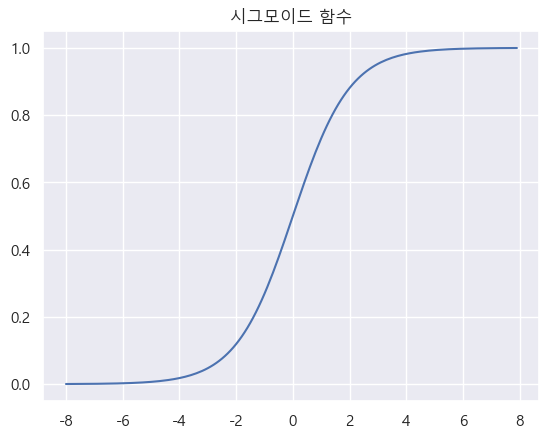

In [179]:
# 시그모이드 함수 그리기
z = np.arange(-8, 8, 0.1)
sigmoid = 1 / (1+np.exp(-z))

plt.plot(z, sigmoid)
plt.title('시그모이드 함수')
plt.show()

- `클래스` - 분류되는 아이템
    - 양성 클래스 - 0.5 보다 크면
    - 음성 클래스 - 0.5 보다 작으면

### 로지스틱 회귀 이진 분류
- 기준데이터: https://bit.fish_csv_data
- Pandas로 데이터 로드
- Numpy는 문자열은 처리안됨

In [180]:
import pandas as pd

In [181]:
# 데이터 로드
fish = pd.read_csv('./fish.csv', encoding='utf-8')
fish


,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


- Species(종), Weight(무게), Length(길이), Diagonal(대각선길이), Height(높이), Width(두께)
- 어종 분류
    - Bream - 도미
    - Roach - 잉어
    - Whitefish - 송어
    - Parkki - 붕어
    - Perch - 농어(베스)
    - Pike - 강꼬치고기
    - Smelt - 빙어

In [182]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [183]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [184]:
fish_input

array([[2.42000e+02, 2.54000e+01, 3.00000e+01, 1.15200e+01, 4.02000e+00],
       [2.90000e+02, 2.63000e+01, 3.12000e+01, 1.24800e+01, 4.30560e+00],
       [3.40000e+02, 2.65000e+01, 3.11000e+01, 1.23778e+01, 4.69610e+00],
       [3.63000e+02, 2.90000e+01, 3.35000e+01, 1.27300e+01, 4.45550e+00],
       [4.30000e+02, 2.90000e+01, 3.40000e+01, 1.24440e+01, 5.13400e+00],
       [4.50000e+02, 2.97000e+01, 3.47000e+01, 1.36024e+01, 4.92740e+00],
       [5.00000e+02, 2.97000e+01, 3.45000e+01, 1.41795e+01, 5.27850e+00],
       [3.90000e+02, 3.00000e+01, 3.50000e+01, 1.26700e+01, 4.69000e+00],
       [4.50000e+02, 3.00000e+01, 3.51000e+01, 1.40049e+01, 4.84380e+00],
       [5.00000e+02, 3.07000e+01, 3.62000e+01, 1.42266e+01, 4.95940e+00],
       [4.75000e+02, 3.10000e+01, 3.62000e+01, 1.42628e+01, 5.10420e+00],
       [5.00000e+02, 3.10000e+01, 3.62000e+01, 1.43714e+01, 4.81460e+00],
       [5.00000e+02, 3.15000e+01, 3.64000e+01, 1.37592e+01, 4.36800e+00],
       [3.40000e+02, 3.20000e+01, 3.73

In [185]:
# 물고기종 타켓
fish_target = fish['Species'].to_numpy()
fish_target[:4]

array(['Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [186]:
# 훈련세트와 테스트세트 나누기
from sklearn.model_selection import train_test_split

In [187]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [188]:
train_input.shape

(119, 5)

In [189]:
test_input.shape

(40, 5)

 - 특성이 전부 단위달라서 무게가 가장 영향이 크게됨
 - 모든 특성데이터를 -2~2 사이로 배치
 - 직접 평균으로 빼고, 표준편차로 나눌것이 아니면 StandardScaler를 사용할 것

In [190]:
# 표준 정규화(Standard Scaler)
from sklearn.preprocessing import StandardScaler

In [191]:
scaler = StandardScaler()
scaler.fit(train_input)

StandardScaler()

In [192]:
# fit_tranform() == fit(), tranform()
train_scaled = scaler.transform(train_input)
test_scaled = scaler.transform(test_input)

In [193]:
train_scaled[:4]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471]])

In [194]:
test_scaled[3]

array([-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464])

#### 이진분류 수행
- Bream(도미)와 Smelt(빙어)만 분리

In [195]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

- bream_smelt_indexes 에서 True 인것만 추출

In [196]:
train_scaled_bream_smelt = train_scaled[bream_smelt_indexes]

In [197]:
train_target_bream_smelt = train_target[bream_smelt_indexes]

In [198]:
train_scaled_bream_smelt.shape

(33, 5)

### 이진분류 수행

In [199]:
from sklearn.linear_model import LogisticRegression

In [200]:
lr = LogisticRegression()
lr

LogisticRegression()

In [201]:
lr.fit(train_scaled_bream_smelt, train_target_bream_smelt)

LogisticRegression()

In [202]:
lr.score(train_scaled_bream_smelt, train_target_bream_smelt)

1.0

In [203]:
lr.predict(train_scaled_bream_smelt[5:11])

array(['Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [204]:
train_input[bream_smelt_indexes][5:11]

array([[  8.7   ,  11.3   ,  12.6   ,   1.9782,   1.2852],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ],
       [925.    ,  39.5   ,  45.3   ,  18.7542,   6.7497],
       [475.    ,  31.    ,  36.2   ,  14.2628,   5.1042],
       [242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [850.    ,  36.    ,  41.6   ,  16.8896,   6.1984]])

In [205]:
train_target_bream_smelt[5:11]

array(['Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

- predict_proba() - 샘플당 두개의 확률 출력
    - 첫번째 열 - 음성클래스(도미)
    - 두번째 열 - 양성클래스(빙어)

In [206]:
lr.predict_proba(train_scaled_bream_smelt[:5])

array([[0.99760007, 0.00239993],
       [0.02737325, 0.97262675],
       [0.99486386, 0.00513614],
       [0.98585047, 0.01414953],
       [0.99767419, 0.00232581]])

In [207]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [208]:
# 계수(기울기/가중치), 절편 구하기
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


- 이진분류 로지스틱 회귀 방정식
    - z = -0.40451732 x 무게 -0.57582787 x 길이 -0.66248158 x 대각선길이 -1.01329614 x 높이 -0.73123131 x 두께 --2.16172774

In [209]:
# z값 -> lr.decision_function() 사용
decisions = lr.decision_function(train_scaled_bream_smelt[:5])
decisions

array([-6.02991358,  3.57043428, -5.26630496, -4.24382314, -6.06135688])

- 시그모이드 함수에 통과시켜 확률 구함
- Scipy - Numpy와 유사한 과학 라이브러리
    - expit() - np.exp(-z)보다 계산이 편리

In [210]:
from scipy.special import expit

In [211]:
expit(decisions)

array([0.00239993, 0.97262675, 0.00513614, 0.01414953, 0.00232581])

- 0.5 초과의 양성클래서 - Smelt(빙어)
- 0.5 이하의 음성클래스 - Bream(도미)

#### 결론
    - 머신러닝에서 이진분류시 로지스틱 회귀가 가장 효과적

### 로지스틱 회귀 다중 분류
- 데이터가 모두 들어있는 train_scaled, train_target을 사용
- 규제 사용 : 과대적합 또는 과소적합을 막기위해서 추가하는 하이퍼 파라미터

In [212]:
# 규제 C=20 기본값 1. 
# 반복횟수 max_inter = 1000 번
lr2 = LogisticRegression(C=20, max_iter=1000)
lr2


LogisticRegression(C=20, max_iter=1000)

In [213]:
# 로지스틱 회귀 훈련
lr2.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=1000)

In [214]:
lr2.score(train_scaled, train_target)

0.9327731092436975

In [215]:
lr2.score(test_scaled, test_target)

0.925

In [216]:
# 테스트 데이터로 예측
lr2.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [217]:
# 실제 데이터
test_target[:5]

array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch'], dtype=object)

- 예측확률표 출력

In [218]:
lr2.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [219]:
proba = lr2.predict_proba(test_scaled[:5])
np.round(proba, decimals = 3)
# Bream, Parkki, Perch,   Pike,      Roach,  Smelt, Whitefish
# 도미,   붕어 , 농어, 강꼬치고기, 유럽잉어,  빙어,    송어


array([[0.   , 0.014, 0.842, 0.   , 0.135, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.934, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.305, 0.006, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

- 네번째 데이터는 Roach로 판단하는 확률이 56.7% 밖에 안됨
- 제대로 예측을 못함

#### 소프트맥스 함수 사용

In [228]:
decision = lr2.decision_function(test_scaled[:5])
decision

array([[ -6.50722812,   1.03902667,   5.16819138,  -2.75730347,
          3.336552  ,   0.34625857,  -0.62549703],
       [-10.87900745,   1.94410611,   4.77600606,  -2.42306183,
          2.98748716,   7.84171374,  -4.24724379],
       [ -4.33809956,  -6.23690281,   3.16746647,   6.4809139 ,
          2.36412675,   2.43431897,  -3.87182373],
       [ -0.69143992,   0.44628534,   2.64291146,  -1.21457286,
          3.2612452 ,  -5.70143406,   1.25700485],
       [ -6.4013861 ,  -1.99137623,   5.81526371,  -0.13464401,
          3.49905133,  -0.08753486,  -0.69937385]])

In [221]:
from scipy.special import softmax

In [232]:
proba2 = softmax(decision, axis=1)
np.round(proba2, decimals=3)
# lr2.predict_proba()로 처리한결과 == scipt.softmax()로 계산한결과

array([[0.   , 0.014, 0.842, 0.   , 0.135, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.934, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.305, 0.006, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

#### 결론
- `K-최근접 이웃 분류` - 이진분류. 나의 주위 가까운 값들을 평균내서 계산한 알고리즘
- `로지스틱회귀` - 선형방정식을 이용한 분류 알고리즘.
    - `시그모이드함수` - 이진 분류
    - `소프트맥스함수` - 다중 분류